# Import données

In [140]:
import pandas as pd
import numpy as np

In [141]:
df = pd.read_csv('dataset_social_technical_1d.csv')

In [142]:
df.head()

,date,close,volume,SMA_15,SMA_ratio,SMA15_Volume,SMA_Volume_Ratio,Stochastic_15,Stochastic_Ratio,RSI_15,RSI_ratio,MACD,price_pct_variation,title_vader_compound,title_roberta_neg,title_roberta_neu,title_roberta_pos
0,2018-01-02,64.400002,219072.0,64.573334,0.994017,348265.266667,0.555061,43.370749,1.145254,49.278354,0.817626,0.108905,0.031072,0.52645,0.840097,0.150846,0.009058
1,2018-01-03,66.199997,256706.0,64.484667,0.993662,329124.000000,0.611814,49.213487,1.075724,42.185655,1.001608,0.167948,2.763115,0.20095,0.505398,0.476686,0.017916
2,2018-01-04,66.680000,306794.0,64.465334,0.990829,310316.666667,0.691514,94.326116,1.055682,48.481671,1.291496,-0.179607,0.331028,-0.61240,0.824533,0.169098,0.006369
3,2018-01-05,67.379997,176037.0,64.615334,0.989152,300906.333333,0.811558,81.718468,0.969574,64.115417,1.050823,-0.474865,0.747608,0.22870,0.666439,0.313903,0.019658
4,2018-01-08,68.120003,271314.0,64.908667,0.987054,281487.000000,0.872077,94.515485,0.931893,80.470877,0.936350,-0.773145,1.671646,0.49390,0.043767,0.919694,0.036539


In [143]:
#features_list = df.loc[:, df.columns != 'date'].columns
features_list = [#'SMA_15','Stochastic_15','RSI_15','MACD',
                'SMA_ratio', 'Stochastic_Ratio', 'RSI_ratio',
                #'SMA15_Volume', 
                'SMA_Volume_Ratio',
                #'close',
                #'title_vader_compound',
                'title_roberta_neg','title_roberta_neu','title_roberta_pos'
                ]

In [144]:
target_variable = ['price_pct_variation']
#target_variable = ['price_pct_variation_1']

In [145]:
print(features_list)
print(target_variable)

['SMA_ratio', 'Stochastic_Ratio', 'RSI_ratio', 'SMA_Volume_Ratio', 'title_roberta_neg', 'title_roberta_neu', 'title_roberta_pos']
['price_pct_variation']


In [146]:
X = df.loc[:, features_list]
y = df.loc[:, target_variable]

# Split données

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [148]:
display(X_train.head())
display(y_train.head())

,SMA_ratio,Stochastic_Ratio,RSI_ratio,SMA_Volume_Ratio,title_roberta_neg,title_roberta_neu,title_roberta_pos
680,0.963740,1.112172,1.096312,0.809388,0.317700,0.633896,0.048404
526,0.981906,1.186610,1.254286,1.428440,0.223974,0.643639,0.132387
85,0.958739,1.061550,1.279707,0.790190,0.003638,0.388107,0.608256
533,0.975835,0.831140,0.766483,1.038957,0.197460,0.601910,0.200630
75,0.951612,1.072484,1.301282,0.812644,0.249670,0.662126,0.088204


,price_pct_variation
680,1.221265
526,-0.385263
85,0.490996
533,-1.435756
75,-2.517623


In [149]:
display(X_test.head())
display(y_test.head())

,SMA_ratio,Stochastic_Ratio,RSI_ratio,SMA_Volume_Ratio,title_roberta_neg,title_roberta_neu,title_roberta_pos
251,0.968491,1.002250,1.085595,0.959270,0.097248,0.795748,0.107004
727,0.982266,1.514840,1.154537,0.649080,0.382141,0.586310,0.031549
293,0.969159,0.925221,0.748175,0.865415,0.280305,0.614064,0.105631
615,1.013992,0.353627,0.322248,0.717783,0.343742,0.614932,0.041326
144,0.972951,0.991400,1.013006,1.027228,0.305177,0.631045,0.063778


,price_pct_variation
251,-1.418675
727,-1.752136
293,1.436311
615,0.692757
144,1.562913


# Preprocessing

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [151]:
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [152]:
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print(X_train[0:5,:])

     SMA_ratio  Stochastic_Ratio  RSI_ratio  SMA_Volume_Ratio  \
680   0.963740          1.112172   1.096312          0.809388   
526   0.981906          1.186610   1.254286          1.428440   
85    0.958739          1.061550   1.279707          0.790190   
533   0.975835          0.831140   0.766483          1.038957   
75    0.951612          1.072484   1.301282          0.812644   

     title_roberta_neg  title_roberta_neu  title_roberta_pos  
680           0.317700           0.633896           0.048404  
526           0.223974           0.643639           0.132387  
85            0.003638           0.388107           0.608256  
533           0.197460           0.601910           0.200630  
75            0.249670           0.662126           0.088204  
[[-1.16282533  0.28857121  0.12188265 -0.75488407 -0.1298397   0.69661933
  -0.78196884]
 [-0.61635533  0.49104996  0.41212865  1.65861388 -0.75575753  0.77074462
   0.12863787]
 [-1.31326356  0.15087411  0.45883524 -0.82972958 -2.

In [153]:
print(X_test.head())
X_test = preprocessor.transform(X_test)
print(X_test[0:5,:])

     SMA_ratio  Stochastic_Ratio  RSI_ratio  SMA_Volume_Ratio  \
251   0.968491          1.002250   1.085595          0.959270   
727   0.982266          1.514840   1.154537          0.649080   
293   0.969159          0.925221   0.748175          0.865415   
615   1.013992          0.353627   0.322248          0.717783   
144   0.972951          0.991400   1.013006          1.027228   

     title_roberta_neg  title_roberta_neu  title_roberta_pos  
251           0.097248           0.795748           0.107004  
727           0.382141           0.586310           0.031549  
293           0.280305           0.614064           0.105631  
615           0.343742           0.614932           0.041326  
144           0.305177           0.631045           0.063778  
[[-1.0199129  -0.01042948  0.10219118 -0.17053725 -1.60205894  1.92802888
  -0.14658815]
 [-0.60550353  1.38387493  0.22885878 -1.37987439  0.30051212  0.33457064
  -0.96472286]
 [-0.99980407 -0.21995787 -0.51775099 -0.53645097 -0.

In [154]:
display(y_train.head())
display(y_test.head())

,price_pct_variation
680,1.221265
526,-0.385263
85,0.490996
533,-1.435756
75,-2.517623


,price_pct_variation
251,-1.418675
727,-1.752136
293,1.436311
615,0.692757
144,1.562913


# Linear Regression

In [155]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [156]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [157]:
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))

R2 score on training set :  0.015776907190023226
R2 score on test set :  0.002789408663328774


# Random Forest Regressor

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [159]:
# Perform grid search
print("Grid search...")
rf_regressor = RandomForestRegressor()

# Grid of values to be tested
params = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [1, 2, 4],
    'n_estimators': [10, 15, 20, 40]
}
gridsearch_rf = GridSearchCV(rf_regressor, param_grid = params, cv = 10) # cv : the number of folds to be used for CV
gridsearch_rf.fit(X_train, y_train.values.ravel())
print("...Done.")

Grid search...
...Done.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

In [160]:
print("Best hyperparameters : ", gridsearch_rf.best_params_)
print("Best validation accuracy : ", gridsearch_rf.best_score_)

Best hyperparameters :  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}
Best validation accuracy :  0.0006591534458804449


In [161]:
best_model_rf = gridsearch_rf.best_estimator_
best_model_rf

RandomForestRegressor(max_depth=4, n_estimators=15)

In [162]:
y_train_pred = best_model_rf.predict(X_train)
y_test_pred = best_model_rf.predict(X_test)

In [163]:
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))

R2 score on training set :  0.2138072947354076
R2 score on test set :  -0.04246965676032488


# XGBoost

In [164]:
import xgboost as xg

In [165]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, seed = 123)

In [166]:
# Fitting the model
xgb_r.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror', seed=123)

In [167]:
r2_score(y_test, xgb_r.predict(X_test))

-0.08314818411824487

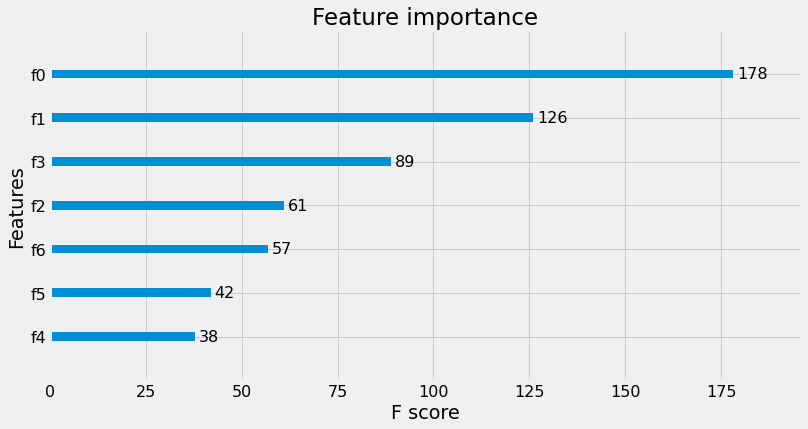

In [168]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(xgb_r, max_num_features=12, ax=ax)
plt.show();

In [169]:
# Perform grid search
print("Grid search...")
xgb_r1 = xg.XGBRegressor()

# Grid of values to be tested
params = {
    'n_estimators': [10, 15, 20, 25, 50, 80]
}
gridsearch_xgb = GridSearchCV(xgb_r1, param_grid = params, cv = 10) # cv : the number of folds to be used for CV
gridsearch_xgb.fit(X_train, y_train.values.ravel())
print("...Done.")

Grid search...
[12:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated

In [170]:
print("Best hyperparameters : ", gridsearch_xgb.best_params_)
print("Best validation accuracy : ", gridsearch_xgb.best_score_)

Best hyperparameters :  {'n_estimators': 15}
Best validation accuracy :  -0.022905749915793507


In [171]:
best_model_xgb = gridsearch_xgb.best_estimator_
best_model_xgb

XGBRegressor(n_estimators=15)

In [172]:
y_train_pred = best_model_xgb.predict(X_train)
y_test_pred = best_model_xgb.predict(X_test)

In [173]:
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))

R2 score on training set :  0.14212807228879054
R2 score on test set :  -0.03435318664348186


# Tensorflow Sequential

In [174]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.metrics import MeanSquaredError, RootMeanSquaredError 
from tensorflow.keras.losses import MeanSquaredError, MeanSquaredLogarithmicError

In [175]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [176]:
train_batch = train.shuffle(len(X_train)).batch(16)
val_batch = val.shuffle(len(X_test)).batch(16)

In [177]:
input_shape = X_train.shape[1:]
model = models.Sequential()
model.add(layers.InputLayer(input_shape=input_shape))
model.add(layers.Dense(16, 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, 'relu'))
model.add(layers.BatchNormalization()),
model.add(layers.Dropout(0.2)),
model.add(layers.Dense(4, 'relu'))
#model.add(layers.Dense(2, 'relu'))
model.add(layers.Dense(1))

In [178]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                128       
                                                                 
 batch_normalization_6 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 batch_normalization_7 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 8)                

In [179]:
model.compile(
    optimizer='adam',
    loss=MeanSquaredLogarithmicError(),
    metrics=[RootMeanSquaredError()]
)

In [180]:
history = model.fit(train_batch, epochs=20, validation_data=val_batch)

Epoch 1/20
46/46 [==============================] - 1s 5ms/step - loss: 0.4206 - root_mean_squared_error: 2.4681 - val_loss: 0.3987 - val_root_mean_squared_error: 2.4464
Epoch 2/20
46/46 [==============================] - 0s 2ms/step - loss: 0.4255 - root_mean_squared_error: 2.4545 - val_loss: 0.3947 - val_root_mean_squared_error: 2.4476
Epoch 3/20
46/46 [==============================] - 0s 2ms/step - loss: 0.4061 - root_mean_squared_error: 2.3829 - val_loss: 0.3754 - val_root_mean_squared_error: 2.4524
Epoch 4/20
46/46 [==============================] - 0s 2ms/step - loss: 0.4004 - root_mean_squared_error: 2.3930 - val_loss: 0.3564 - val_root_mean_squared_error: 2.4645
Epoch 5/20
46/46 [==============================] - 0s 2ms/step - loss: 0.3955 - root_mean_squared_error: 2.3706 - val_loss: 0.3479 - val_root_mean_squared_error: 2.4738
Epoch 6/20
46/46 [==============================] - 0s 2ms/step - loss: 0.3673 - root_mean_squared_error: 2.3180 - val_loss: 0.3488 - val_root_mean_sq

Minimum Validation Loss: 0.3020


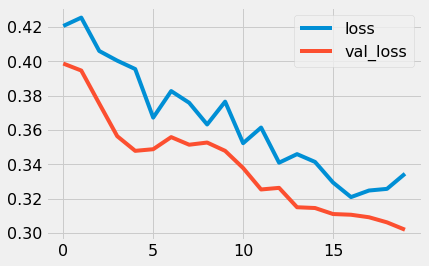

In [181]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Minimum Validation Loss: 2.4464


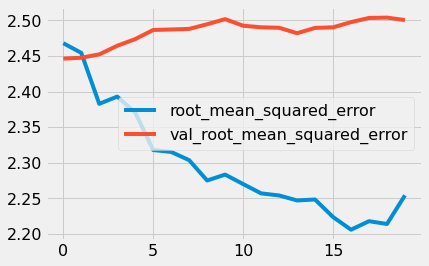

In [182]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['root_mean_squared_error', 'val_root_mean_squared_error']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_root_mean_squared_error'].min()));

In [183]:
print("R2 score on training set : ", r2_score(y_train, model.predict(X_train)))
print("R2 score on test set : ", r2_score(y_test, model.predict(X_test)))

R2 score on training set :  -0.04814860864835735
R2 score on test set :  -0.04814498431297265
